In [121]:
import cv2
import numpy as np

In [135]:
img_ = cv2.imread('resource/right.jpg')
img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img = cv2.imread('resource/left.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [136]:
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [137]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

In [139]:
# Apply ratio test
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
matches = np.asarray(good)

In [141]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    print(H)
#print H
else:
    raise AssertionError("“Can’t find enough keypoints.”")

[[ 4.79383306e-01  2.29759235e-02  2.78966501e+02]
 [-8.43927474e-02  5.70092439e-01  4.74715368e+01]
 [-2.09741240e-04 -3.26934344e-05  1.00000000e+00]]


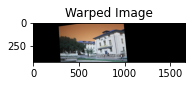

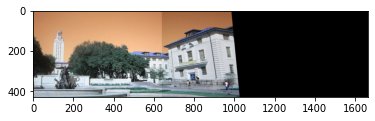

In [109]:
import matplotlib.pyplot as plt

dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title("Warped Image")
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite("‘output.jpg’",dst)
plt.imshow(dst)
plt.show()

In [ ]:
img1 = cv2.imread('resource/right.jpg')

img2 = cv2.imread('resource/left.jpg')


In [110]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to find matches
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)
matches

[< cv2.DMatch 000001D89E466550>,
 < cv2.DMatch 000001D89E466F30>,
 < cv2.DMatch 000001D89E467590>,
 < cv2.DMatch 000001D89E466BF0>,
 < cv2.DMatch 000001D89E4677D0>,
 < cv2.DMatch 000001D89E467C10>,
 < cv2.DMatch 000001D89E468070>,
 < cv2.DMatch 000001D89E4687D0>,
 < cv2.DMatch 000001D89E466670>,
 < cv2.DMatch 000001D89E467DF0>,
 < cv2.DMatch 000001D89E4648F0>,
 < cv2.DMatch 000001D89E4687B0>,
 < cv2.DMatch 000001D89E4681F0>,
 < cv2.DMatch 000001D89E467330>,
 < cv2.DMatch 000001D89E4670B0>,
 < cv2.DMatch 000001D89E467110>,
 < cv2.DMatch 000001D89E468670>,
 < cv2.DMatch 000001D89E466750>,
 < cv2.DMatch 000001D89E4672B0>,
 < cv2.DMatch 000001D89E468850>,
 < cv2.DMatch 000001D89E464350>,
 < cv2.DMatch 000001D89E467270>,
 < cv2.DMatch 000001D89E46AA90>,
 < cv2.DMatch 000001D89E4686B0>,
 < cv2.DMatch 000001D89E468830>,
 < cv2.DMatch 000001D89E466C10>,
 < cv2.DMatch 000001D89E464C30>,
 < cv2.DMatch 000001D89E464BF0>,
 < cv2.DMatch 000001D89E4670F0>,
 < cv2.DMatch 000001D89E46A8B0>,
 < cv2.DMa

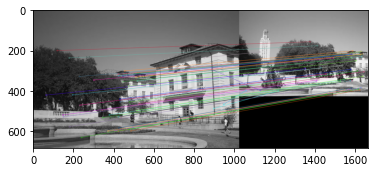

In [112]:
img_matches = cv2.drawMatches(
    img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [113]:
# Extract location of good matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute homography
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
H

array([[ 4.77713963e-01,  2.40339786e-02,  2.78924511e+02],
       [-8.52153694e-02,  5.70475240e-01,  4.75098890e+01],
       [-2.12549446e-04, -3.10597164e-05,  1.00000000e+00]])

In [146]:
# Get the dimensions of the images
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

# Get the canvas dimesions
pts = np.float32([[0, 0], [0, h1], [w1, h1], [w1, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, H)
img2_warped = cv2.warpPerspective(img1, H, (w1 + w2, h1))

# Place the first image on the canvas
img2_warped[0:img2.shape[0], 0:img2.shape[1]] = img2

ValueError: could not broadcast input array from shape (427,640) into shape (683,1024)

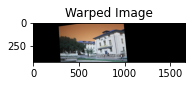

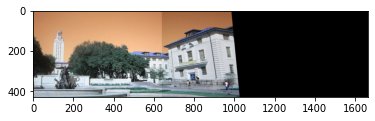

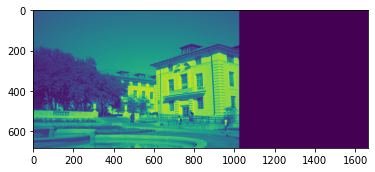

In [145]:
# Simple blending technique
result = img2_warped

dst = cv2.warpPerspective(img_,H,(img.shape[1] + img_.shape[1], img.shape[0]))
plt.subplot(122),plt.imshow(dst),plt.title("Warped Image")
plt.show()
plt.figure()
dst[0:img.shape[0], 0:img.shape[1]] = img
cv2.imwrite("‘output.jpg’",dst)
plt.imshow(dst)
plt.show()


plt.imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()